# Python 8: Visualization using Histograms 
## ECE 204 Data Science & Engineering

### Lecture Notes

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### In-Class Activity

We have a dataset (__"Scores.csv"__) containing scores of 1,000 students on a test. The minimum score possible is 0 and the maximum is 70. The dataset contains only one column, i.e. "Scores".

In [2]:
df1 = pd.read_csv("Scores.csv")
df1.head()

,Scores
0,33
1,37
2,29
3,35
4,46


---
**Problem 1.** Visualize the distribution of scores using a histogram. Choose an appropriate bin size, title and labels. <br>**Question:** What does the shape of the histogram look like?

array([[<Axes: title={'center': 'Scores'}>]], dtype=object)

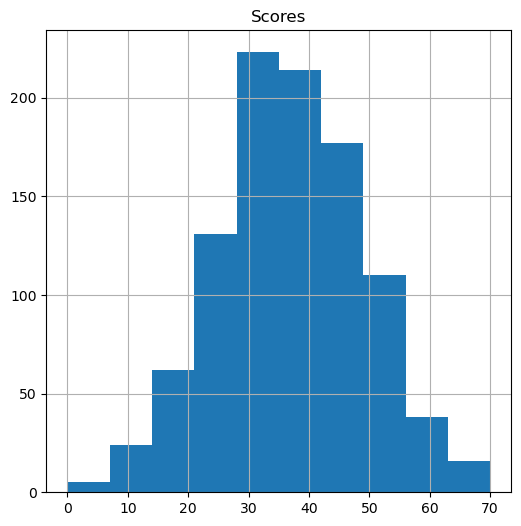

In [3]:
hist = df1.hist(bins=10, figsize=(6,6))
hist

---
**Problem 2.** Suppose you want to divide the scores into 3 letter grades 'A', 'B', and 'C'. We want A's to be scores of 50 or higher, C's to be scores less than 20, and B's to be everything else. Create a histogram with three bins, one for each of the letter grades. <br>**Question:** What is the approximate count of scores that are to be assigned the grade B? <br> **Hint:** Remember that you can customize bin boundaries!

/Users/hydrablaster/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6827: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


768

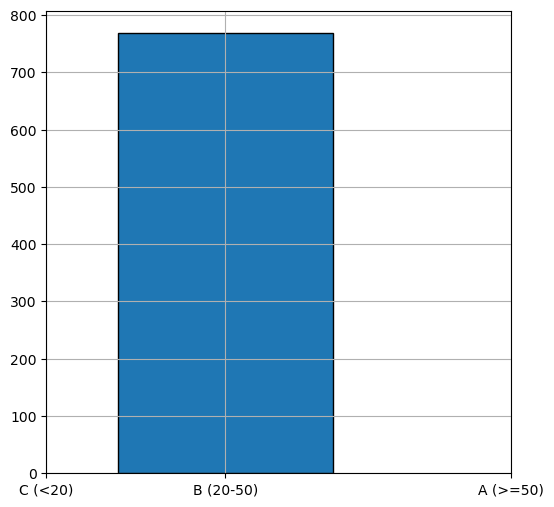

In [4]:
bins = [-np.inf, 20, 50, np.inf]
ax = df1['Scores'].hist(bins=bins, figsize=(6,6), edgecolor='black')
plt.xticks([10, 35, 75], ['C (<20)', 'B (20-50)', 'A (>=50)'])
# plt.show()
grade_B_count = ((df1['Scores']>=20) & (df1['Scores']<50)).sum()
grade_B_count

---
**Problem 3.** Now, let's say we want to assign letter grades a bit differently. Instead of the rule mentioned in Problem 2, we decide that the highest 300 scores get assigned an 'A', the middle 400 scores get a 'B' and the lowest 300 scores get a 'C'. <br>
Create a Pandas DataFrame containing two columns: <br>
1. `'Scores'`: The sorted (ascending) 1000 scores from the above defined dataset. **Hint:** The `sorted()` function can be used on a `pd.Series object`. You can also use the `pd.Series.sort_values()` method<br>
2. `'Grade'`: Letter Grades assigned according to the rule given above

In [5]:
LetterGrade = ['C']*300 + ['B']*400 + ['A']*300   # Letter grade list for convenience
df1['LetterGrade'] = LetterGrade
scores = df1.Scores.sort_values()
assert (len(scores) == len(LetterGrade)), "Mistmatch in length of scores and LetterGrade"
df_grades = pd.DataFrame({'Scores': scores, 'LetterGrade': LetterGrade})
df_grades

,Scores,LetterGrade
628,0,C
370,1,C
363,2,C
201,4,C
129,5,C
...,...,...
939,67,A
798,67,A
600,68,A
521,69,A


Using this new DataFrame, Plot histograms of scores for each letter grade separately. You should have three histograms, one each for scores with Grade A, scores with Grade B, and scores with Grade C. <br> <br>**Question:** What does the shape of histogram for Grade 'C' Scores look like?

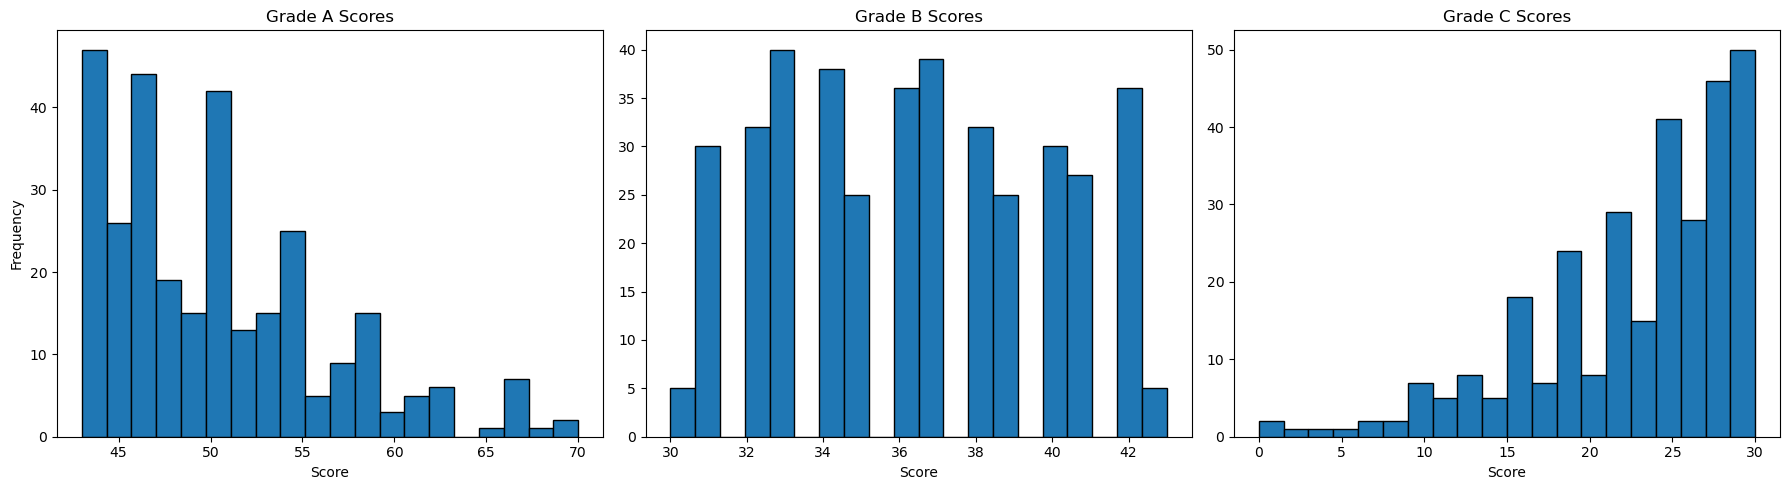

In [6]:
df_A = df_grades[df_grades['LetterGrade'] == 'A']
df_B = df_grades[df_grades['LetterGrade'] == 'B']
df_C = df_grades[df_grades['LetterGrade'] == 'C']

plt.figure(figsize=(18, 5))

# Histogram for Grade A
plt.subplot(1, 3, 1)
plt.hist(df_A['Scores'], bins=20, edgecolor='black')
plt.title("Grade A Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")

# Histogram for Grade B
plt.subplot(1, 3, 2)
plt.hist(df_B['Scores'], bins=20, edgecolor='black')
plt.title("Grade B Scores")
plt.xlabel("Score")

# Histogram for Grade C
plt.subplot(1, 3, 3)
plt.hist(df_C['Scores'], bins=20, edgecolor='black')
plt.title("Grade C Scores")
plt.xlabel("Score")

plt.tight_layout()
plt.show()

**Problem 4.** Please use the `df2` DataFrame below to answer the following question.

In [7]:
x = [-62, 162, 119, -169, 165, -32, 13, 182, -173, 57, 94, 113, -177, 115, -199, -159, 8, 123, 65, 50, -109, -179, -18, 32, 63, 135, 97, 199, -133, 149, -87, -42, 36, 21, 31, 4, 148, 12, -185, -53, 37, -36, 158, -154, -114, -180, 59, 118, 88, 110, -102, 24, -181, 82, 52, -132, -122, 188, -51, 38, 128, 42, -143, 29, -142, 71, 146, -40, -47, -176, -113, 173, -121, -43, 143, 46, 51, -27, 23, -26, -141, 75, -98, -30, 5, 144, -148, 26, -193, 167, -15, 145, 58, -1, -89, -34, 125, -184, 139, 107]
y = [-157, 69, -15, -164, 187, 128, 137, 171, -64, 33, 28, -129, 143, 106, -57, -189, -106, 131, -85, 142, -116, 163, 68, -32, 199, -190, 105, -198, -68, 53, 91, 63, 112, -6, -193, -52, -83, -3, 20, -56, -134, -87, -158, -130, -137, 104, 152, -146, 174, -111, 85, 162, -77, 81, 26, -82, 170, 153, 136, -13, -180, -30, 139, 58, -127, -88, 188, 86, -168, 41, -76, 82, 144, 155, -196, -1, 17, -95, -179, 178, 9, -67, 133, -58, -48, 149, -65, 45, 192, 191, -55, -4, 87, -165, -7, 71, -103, 51, -74, -105]
df2 = pd.DataFrame(y, columns=["y"], index=x)

**Question.** What value should `label_location` be so that the code in the cell below returns True?

In [11]:
integer_location = 42
label_location = 158

df2.iloc[integer_location] == df2.loc[label_location]

y    True
Name: 158, dtype: bool

In [21]:
def my_f(m1, m2):
  return m1 * m2

def my_ops(m1, m2):
  def my_f(m1, m2):
    return m1 ** m2

  return my_f(max(m1, m2), min(m1, m2))

my_f(my_ops(5, 2), 7)

175